# Vehicle Loan Prediction Machine Learning Model

# Chapter 7 - Random Forest

### Recap and Load
- As always, let's begin by importing our libraries and loading the data
- Notice that we are importing RandomForestClassifier from sklearn.ensemble

*Throughout this chapter you may see slightly different results to those on the demo videos. The outputs vary due to the random nature of the random forest algorithm but they should be similar to those in the videos*

*Some of the models we will build here are a bit more complex, if you are running into memory related issues try and free up memory by closing down any programs that you do not need to complete the chapter*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [2]:
loan_df = pd.read_csv('../data/vehicle_loans_feat.csv', index_col='UNIQUEID')

Just like we did for Logistic Regression let's convert our categorical variables to the 'category' data type

In [3]:
#convert to category
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

Now we can bring the plot_roc_curve and eval_model functions we defined in chapter 6

In [4]:
#get plot roc curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [6]:
#get eval models

def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    conf_mat = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    #print(conf_mat)
    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))


## Lesson 1 - Building The Forest

In this lesson, we will use the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from sklearn to build a Random Forest model for our data


### EXERCISE 

- We seem to be duplicating the code for creating training/test sets and dummy variables 
- Fill in the function definition below to take in a data frame, create dummy variables and split the data into train/test sets 
- The return statement has been filled out for you

### SOLUTION

In [8]:
def encode_and_split(loan_df):
    #type solution here
    loan_data_dumm = pd.get_dummies(loan_df, prefix_sep='_', drop_first=True)

    x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
    y = loan_data_dumm['LOAN_DEFAULT']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test

Now let's test our new function and create a training and test set for RandomForest, this time using the full set of features 

In [9]:
#run encode and split
x_train, x_test, y_train, y_test = encode_and_split(loan_df)

In [10]:
#get training shape
print("Training Shape", x_train.shape)
print("Training Rows", y_train.count())

Training Shape (186523, 92)
Training Rows 186523


In [11]:
#get testing shape
print("Testing Shape", x_test.shape)
print("Testing Rows", y_test.count())

Testing Shape (46631, 92)
Testing Rows 46631


In [12]:
#check class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64
0    0.782248
1    0.217752
Name: LOAN_DEFAULT, dtype: float64


Ok great, looks like we have a train and test set with the class distribution we want

### EXERCISE 

- Use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train and evaluate a Random Forest Model
- HINT: The model can be trained using the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) function

### SOLUTION

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


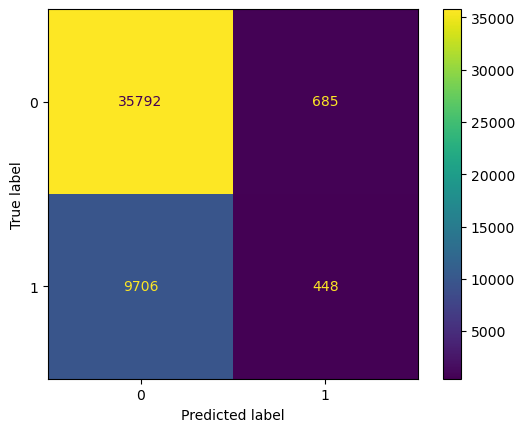



Accuracy:  0.777165404988098
Precision:  0.3954104148278906
Recall:  0.04412054362812685
F1:  0.07938336138920882
AUC:  0.6216615817482675


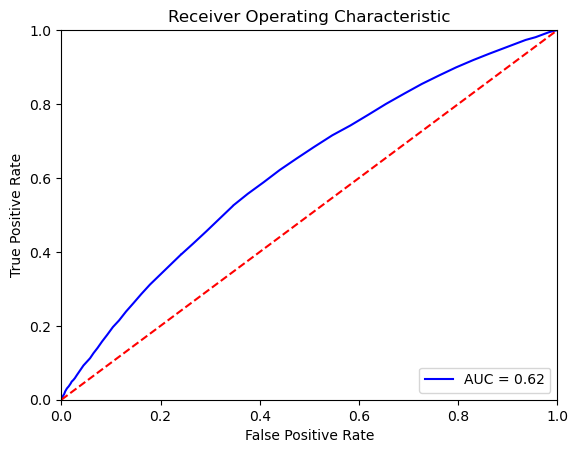

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


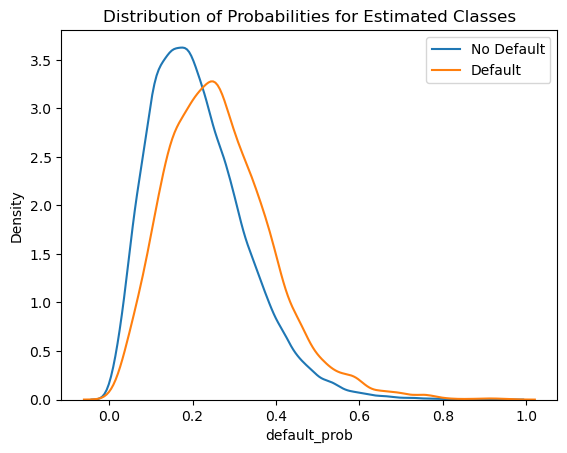

true_class  predicted_class
0           0                  0.981221
            1                  0.018779
1           0                  0.955879
            1                  0.044121
Name: predicted_class, dtype: float64


In [13]:
#type solution here
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

Let's take a minute to interpret these results 

### Accuracy 

- ~78% similar to the simple logistic regression model we built already

### Precision 

- 39% better than simple logistic Regression which had ~33% 
- More of the instances we classified as defaults actually were defaults 
- However, most of the instances we classify as defaults are actually not defaults

### Recall 

- Recall has increased dramatically, from 0.03% to 4.5%!
- Random Forest picked up a lot more of the actual positive cases
- It still missed most of them

### F1

- The F1 score has also increased dramatically from 0.0006 to ~0.08! 
- There is a better balance between Precision and Recall for Random Forest
- Although this is still generally poor

### AUC 

- The area under the roc curve has increased very slightly

### Probability Distributions 

- Plot shows bad class separation 
- Majority of cases unlikely to be classified as defaults 

Generally the random forest is better than Logistic Regression but it is still not doing a good job

## Lesson 2 - Overfitting

A model is said to be overfitted if it performs very well on training data but does not generalize well to unseen test data

We can look at evaluate our model's performance on the training data to investigate overfitting

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


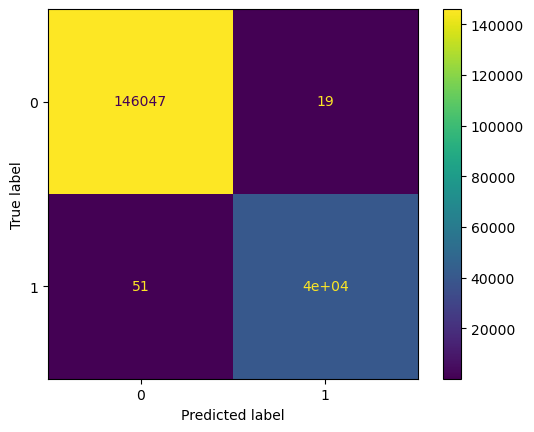



Accuracy:  0.9996247111616262
Precision:  0.9995299938157081
Recall:  0.9987394023283981
F1:  0.9991345416780001
AUC:  0.9999964971862703


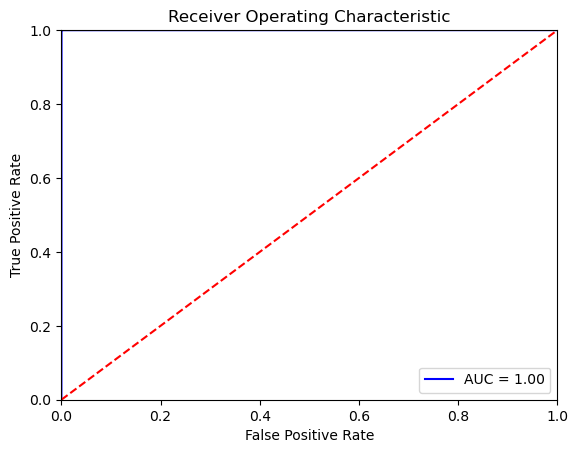

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


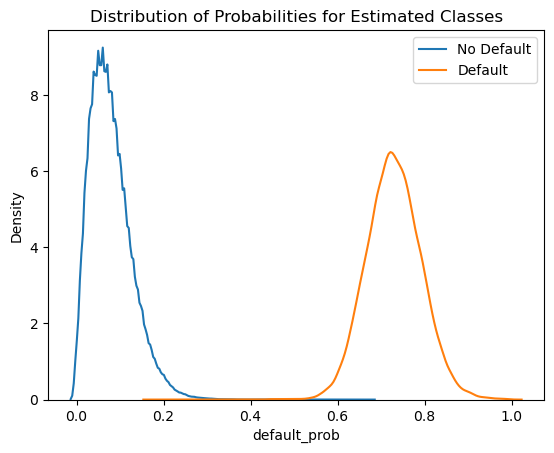

true_class  predicted_class
0           0                  0.999870
            1                  0.000130
1           1                  0.998739
            0                  0.001261
Name: predicted_class, dtype: float64


In [14]:
#eval on training data
eval_model(rfc_model, x_train, y_train)

Wow! Pretty clear evidence that our random forest is overfitting, it has nearly perfect results on the training data and poor results on the test data

## Lesson 3 - Hyperparameters 

Classification performance of random forest can be heavily influenced by its hyperparameters

### Hyperparameter Tuning 

- The process of selecting optimal hyperparameters 
- Can be tricky and time-consuming, many automated methods exists for finding the parameters that yield the best classification results 
- Out of scope of this course but if you are interested look at [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Number of Trees
- How big is the forest?
- Typically increasing the number of trees increases model performance up to a certain point
- Too many trees can increase the computational cost and does little to benefit classification performance
- set through the n_estimators property

### Maximum Depth
- The longest path between a tree root node and its deepest leaf node
- exposed through max_depth parameter which defaults to None, meaning the max depth is not limited
- limiting the depth of the trees can be used to reduce overfitting


 



### Number of Trees 

Let's do some manual exploration of the forest size parameter, remember the default value is 100 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


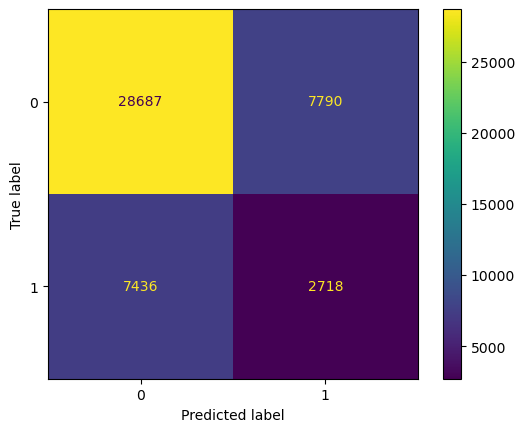



Accuracy:  0.6734790161051661
Precision:  0.25866006851922346
Recall:  0.26767776245814456
F1:  0.26309166586003285
AUC:  0.5271120303431008


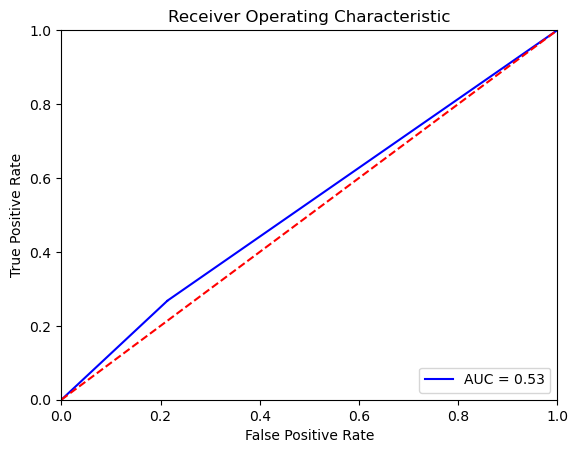

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


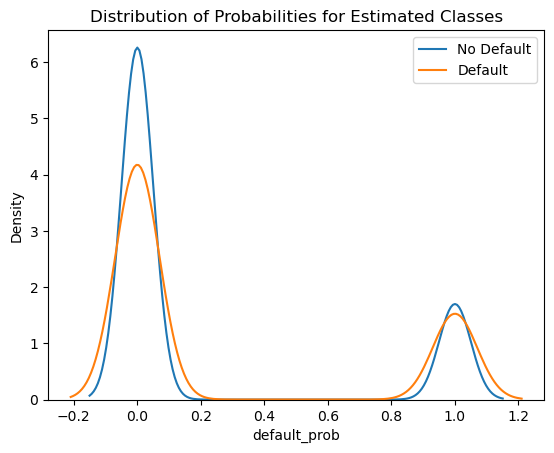

true_class  predicted_class
0           0                  0.786441
            1                  0.213559
1           0                  0.732322
            1                  0.267678
Name: predicted_class, dtype: float64


In [15]:
# 1 estimator
rfc_model = RandomForestClassifier(n_estimators=1)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

- With a forest size of 1, the random forest behaves as a standalone decision tree and is unable to distinguish between the two classes
- With AUC of 0.52 it is only marginally better than a random classifier

Let's see what happens if we increase the number of trees to 10

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


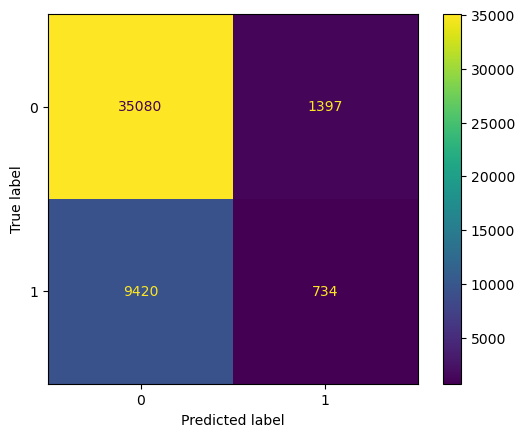



Accuracy:  0.7680298513864168
Precision:  0.344439230408259
Recall:  0.07228678353358282
F1:  0.1194953194953195
AUC:  0.5872542895337456


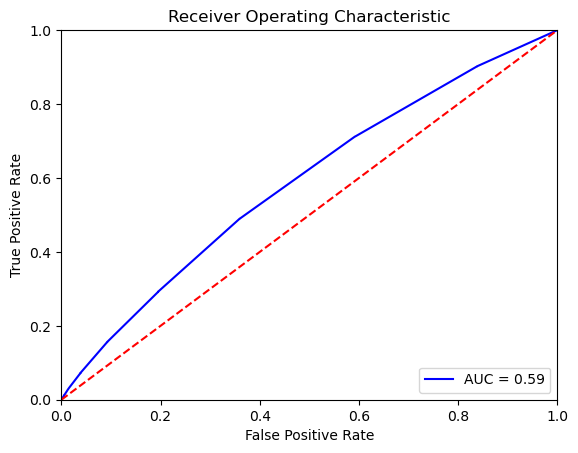

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


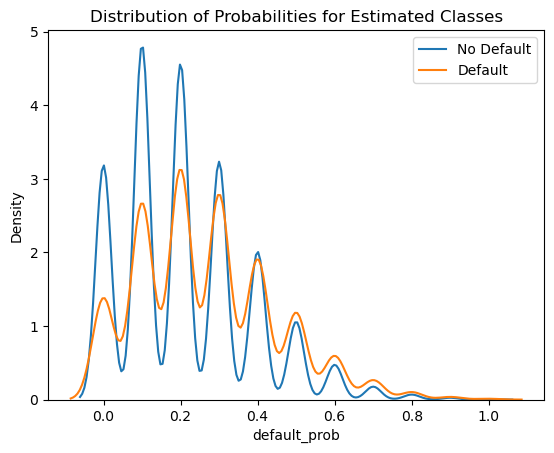

true_class  predicted_class
0           0                  0.961702
            1                  0.038298
1           0                  0.927713
            1                  0.072287
Name: predicted_class, dtype: float64


In [16]:
#10 estimators
rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

- We see here that with a forest size of 10 the separation ability of the model increases with an AUC of 0.58
- Multiple peaks on the distribution chart suggest that this is not a very stable model

How about with the default value of 100 trees?

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


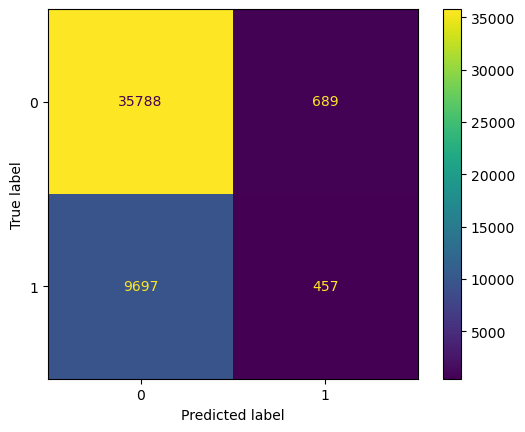



Accuracy:  0.7772726297956295
Precision:  0.3987783595113438
Recall:  0.04500689383494189
F1:  0.08088495575221238
AUC:  0.6227741234693752


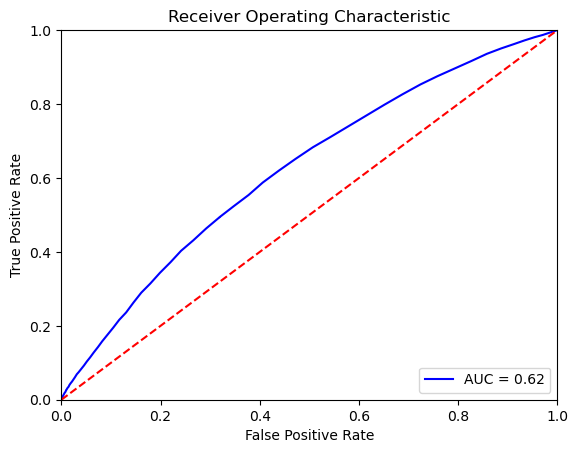

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


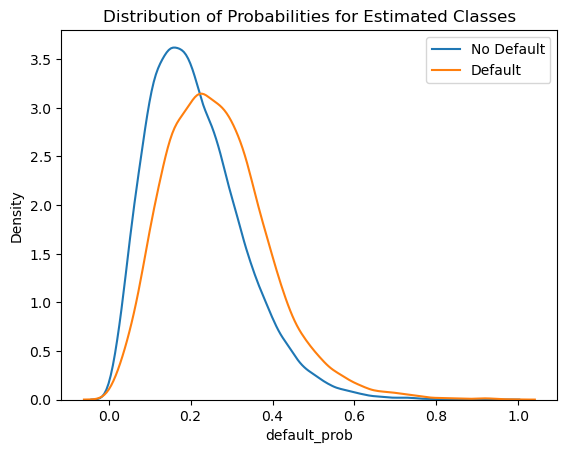

true_class  predicted_class
0           0                  0.981111
            1                  0.018889
1           0                  0.954993
            1                  0.045007
Name: predicted_class, dtype: float64


In [17]:
#100 estimators
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

- With 100 estimators the AUC improved from 0.58 to 0.62
- Class distributions appeared more defined and settled

What about if we increase to 300?

*NB - You might not be able to run all the scenarios due to system capacity. If you receive a "MemoryError", it means the model is too expensive to run on your computer. Try reducing n_estimators to 200 or 150.*

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


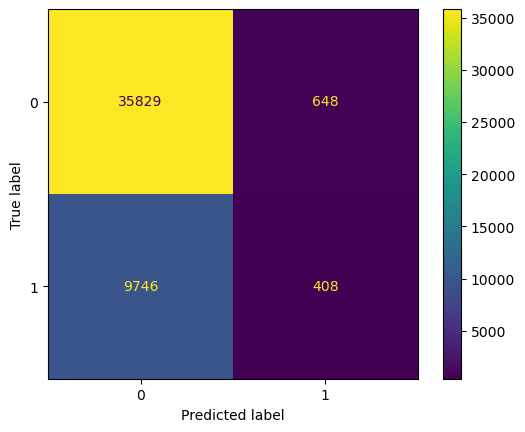



Accuracy:  0.7771010701035792
Precision:  0.38636363636363635
Recall:  0.04018120937561552
F1:  0.0727921498661909
AUC:  0.6284440063302574


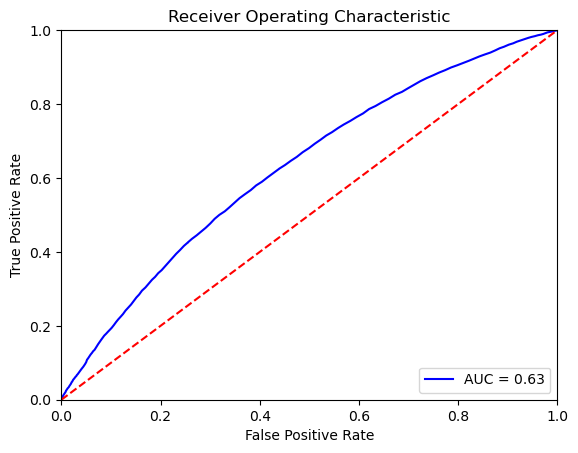

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


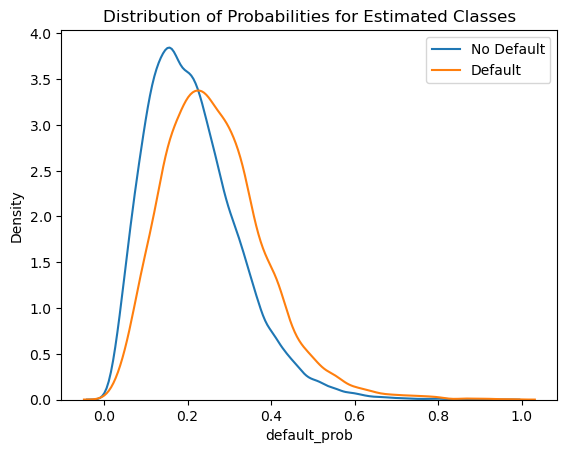

true_class  predicted_class
0           0                  0.982235
            1                  0.017765
1           0                  0.959819
            1                  0.040181
Name: predicted_class, dtype: float64


In [18]:
#300 estimators
rfc_model = RandomForestClassifier(n_estimators=300)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

Very similar performance to the default value of 100! 

Increasing the size of the forest helps classification performance up to a point

However, it also increases the computational cost of training the model

### Maximum Depth

We observed earlier that our random forest model is overfitting

One way of tackling overfitting in random forest is by limiting the Maximum Depth of the trees. This prevents the classifiers from growing to large picking up noise in the training data

The default value of max_depth is None (it is not limited!)

Let's do some experiments

*NB - You might not be able to run all the scenarios due to system capacity. If you receive a "MemoryError", it means the model is too expensive to run on your computer.*

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


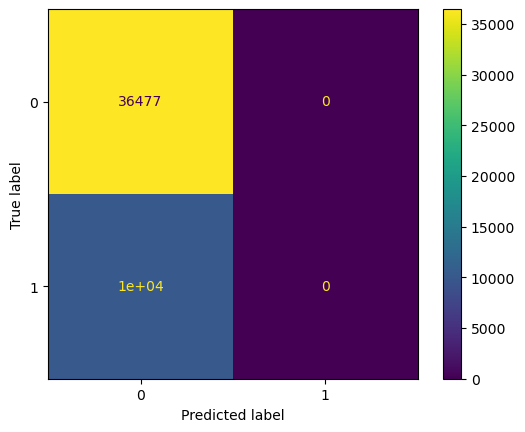



Accuracy:  0.7822478608650898
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.6302132279543872


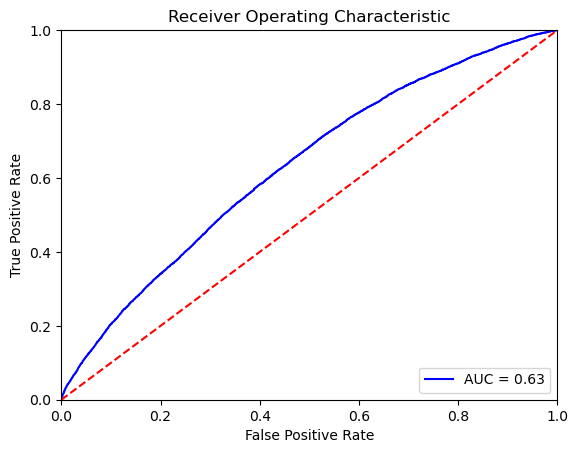

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


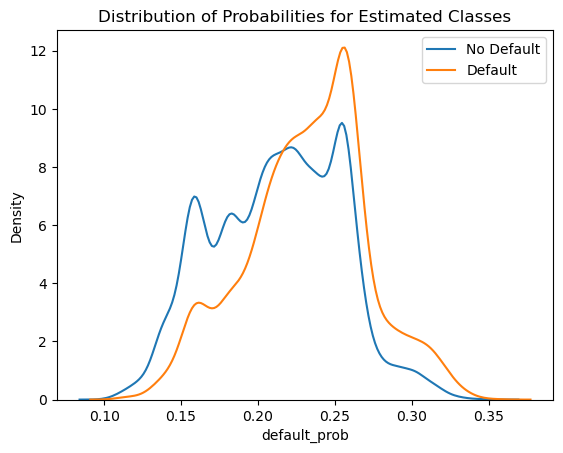

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [19]:
#max depth 5
rfc_model = RandomForestClassifier(n_estimators=100, max_depth = 5)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

We have increased the AUC but the model is failing to identify any loan defaults

Let's take a look at how it performs on the training data

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


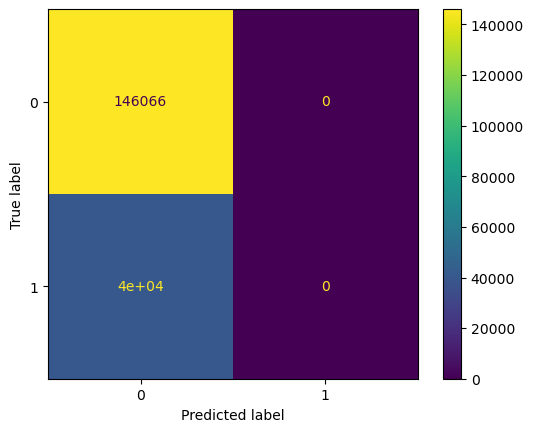



Accuracy:  0.783099135227291
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.6398216012491473


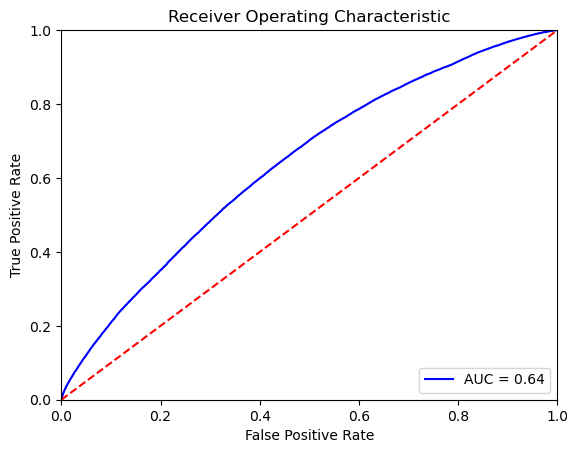

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


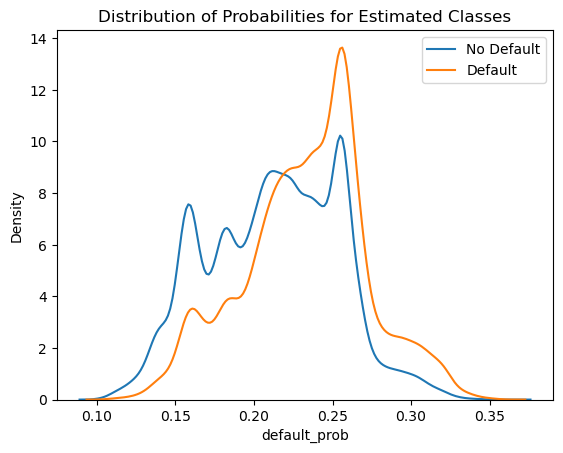

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [20]:
#check the overfitting
eval_model(rfc_model, x_train, y_train)

As with the test data, the model is not identifying any defaults.

Very similar performance between training and test data tells us we are not overfitting anymore, but the model has very little predictive power

Limiting the tree size to 5 has probably oversimplified the model and actually given us an underfit model!

Let's try again with a larger max_depth

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


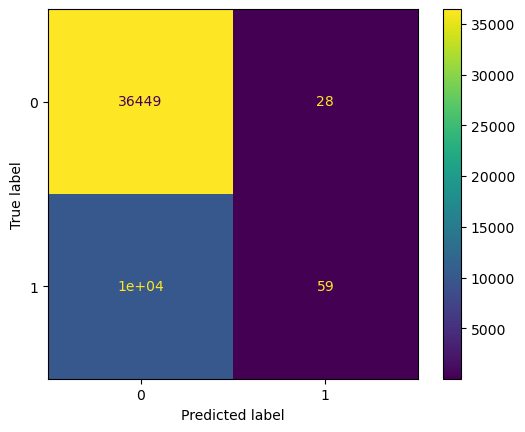



Accuracy:  0.7829126546717848
Precision:  0.6781609195402298
Recall:  0.005810518022454205
F1:  0.011522312274191971
AUC:  0.6491877500344518


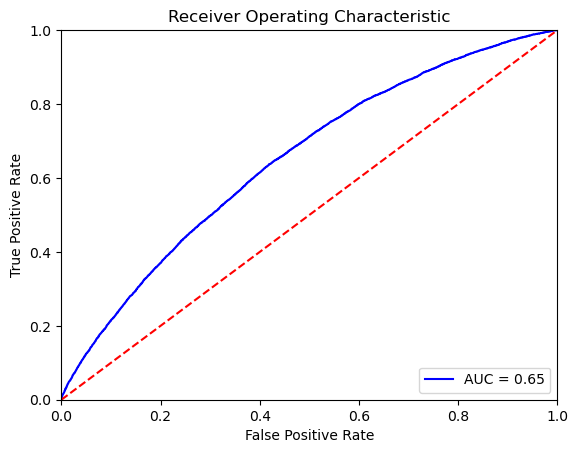

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


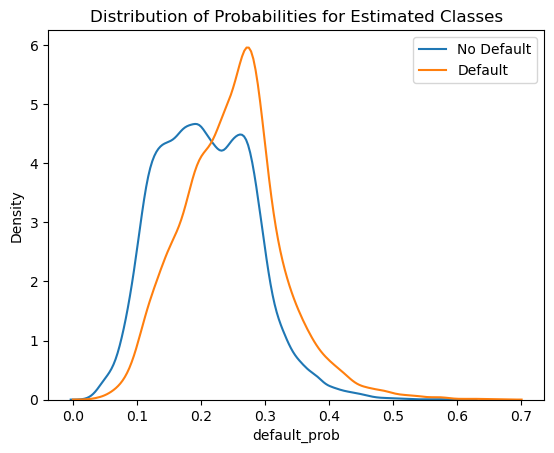

true_class  predicted_class
0           0                  0.999232
            1                  0.000768
1           0                  0.994189
            1                  0.005811
Name: predicted_class, dtype: float64


In [21]:
#max depth 15
rfc_model = RandomForestClassifier(n_estimators=100, max_depth = 15)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

A few things to note here! 

We have increased the AUC to ~0.65, this model has the best ability to separate classes that we have seen so far! 

It is also has a very good precision score of 67%, but we are still identifying very few loan defaults hence the poor recall

Let's have a look at the training set performance!

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


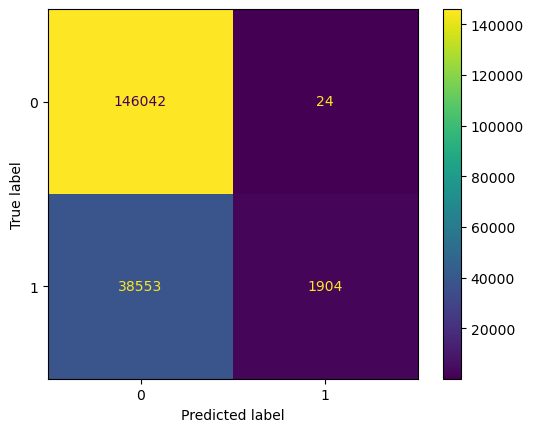



Accuracy:  0.7931783211721879
Precision:  0.9875518672199171
Recall:  0.047062313073139385
F1:  0.08984310487200661
AUC:  0.8244453001154537


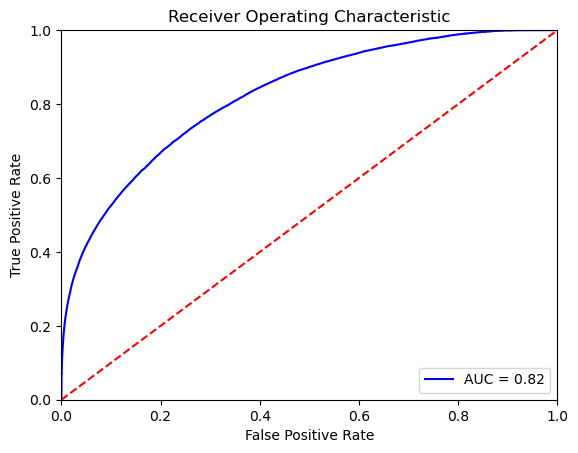

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


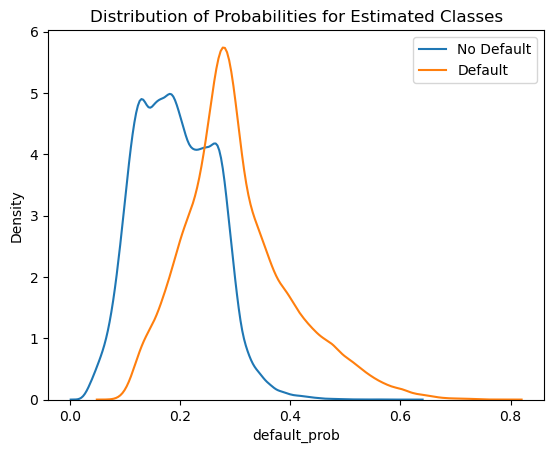

true_class  predicted_class
0           0                  0.999836
            1                  0.000164
1           0                  0.952938
            1                  0.047062
Name: predicted_class, dtype: float64


In [22]:
#check the overfitting
eval_model(rfc_model, x_train, y_train)

Our model does perform better on the training data so it could be a little overfitted. However, it certainly is much less dramatic than before! 

We have now limited the complexity of the trees in our forest which has reduced overfitting. 

### A Note on Hyperparameter Tuning 

- We have discussed the effects of n_estimators and max_depth in isolation 
- Random Forest has many more parameters that can be tuned 
- In reality, parameters are dependent on each other, i.e changing one affects the others
- Automated methods to find the right balance exist, look at [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)